In [1562]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics

In [1563]:
fig_path = '../fig/'

# run_plot_quality_avgQP

In [1564]:
codec_list = ['x264', 'x265', 'VP9', 'SVT-AV1']

In [1565]:
frames = []
for codec in codec_list:
    df_codecs = pd.read_csv(f'../metrics/YOUTUBE_UGC_1080P_{codec}_metrics.csv')

    cat_uniques = df_codecs['category'].unique()
    for cat in cat_uniques:
        cat_data = df_codecs[df_codecs['category'].isin([cat])]
        # print(cat_data)

        avg_bitrate = []
        avg_psnr = []
        avg_vmaf = []
        qp_list = []
        std_bitrate = []
        std_psnr = []
        std_vmaf = []

        qp_uniques = df_codecs['QP'].unique()
        for qp in qp_uniques:
            qp_data = cat_data[cat_data['QP'].isin([qp])]
            # print(qp_data)

            avg_bitrate.append(qp_data['bitrate_encoded (kb/s)'].mean())
            avg_psnr.append(qp_data['PSNR'].mean())
            avg_vmaf.append(qp_data['VMAF'].mean())
            qp_list.append(qp)

            std_bitrate.append(qp_data['bitrate_encoded (kb/s)'].std(ddof=0))
            std_psnr.append(qp_data['PSNR'].std(ddof=0))
            std_vmaf.append(qp_data['VMAF'].std(ddof=0))

        df_avg = pd.DataFrame(columns=['category', 'Bitrate (kb/s)', 'PSNR (dB)', 'VMAF', 'QP', 'std_bitrate', 'std_psnr', 'std_vmaf', 'codec'])
        genre_name = cat
        df_avg['Bitrate (kb/s)'] =avg_bitrate
        df_avg['PSNR (dB)'] = avg_psnr
        df_avg['VMAF'] = avg_vmaf

        df_avg['std_bitrate'] = std_bitrate
        df_avg['std_psnr'] = std_psnr
        df_avg['std_vmaf'] = std_vmaf

        df_avg['QP'] = qp_list
        df_avg['codec'] = codec
        df_avg['category'] = genre_name

        metrics = f'../metrics/average_QP/YOUTUBE_UGC_1080P_all_average_{genre_name}_{codec}_metrics.csv'
        df_avg.to_csv(metrics, index=None)
        frames.append(df_avg)
df_avg

,category,Bitrate (kb/s),PSNR (dB),VMAF,QP,std_bitrate,std_psnr,std_vmaf,codec
0,TelevisionClip,27905.333333,46.603471,98.139349,12,22989.797655,1.488700,1.490361,SVT-AV1
1,TelevisionClip,21043.333333,44.968122,96.798340,18,18284.457814,1.897469,2.524965,SVT-AV1
2,TelevisionClip,16246.333333,43.680018,95.316884,24,14531.193352,2.285820,3.529127,SVT-AV1
3,TelevisionClip,11130.333333,42.011677,92.979218,30,10167.536619,2.934050,4.746608,SVT-AV1
4,TelevisionClip,6613.333333,40.097381,88.965645,36,6081.442007,3.623219,6.454697,SVT-AV1
5,TelevisionClip,3374.666667,38.285337,83.951748,42,2951.991682,4.245678,8.039218,SVT-AV1
6,TelevisionClip,1702.666667,36.873927,78.392795,48,1375.149042,4.553002,9.695515,SVT-AV1
7,TelevisionClip,926.666667,35.823602,72.630032,54,684.636319,4.593475,11.513255,SVT-AV1
8,TelevisionClip,441.666667,34.480200,64.461030,60,279.289973,4.523022,13.244899,SVT-AV1


In [1566]:
df = pd.concat(frames)
# print(df)
metrics_name = f'../metrics/average_QP/YOUTUBE_UGC_1080P_all_average_metrics.csv'
df.to_csv(metrics_name, index=None)
df

,category,Bitrate (kb/s),PSNR (dB),VMAF,QP,std_bitrate,std_psnr,std_vmaf,codec
0,Animation,32259.333333,50.776528,98.135346,10,5551.276990,1.203500,1.311900,x264
1,Animation,20581.333333,46.624358,97.560932,15,3063.056680,1.249946,1.857829,x264
2,Animation,11782.000000,42.493721,96.428278,20,4188.695819,1.288354,2.805121,x264
3,Animation,6942.333333,38.709675,93.709940,25,3791.280552,1.710244,4.546598,x264
4,Animation,4321.000000,35.278882,89.036568,30,2760.810026,2.305653,7.371580,x264
...,...,...,...,...,...,...,...,...,...
4,TelevisionClip,6613.333333,40.097381,88.965645,36,6081.442007,3.623219,6.454697,SVT-AV1
5,TelevisionClip,3374.666667,38.285337,83.951748,42,2951.991682,4.245678,8.039218,SVT-AV1
6,TelevisionClip,1702.666667,36.873927,78.392795,48,1375.149042,4.553002,9.695515,SVT-AV1
7,TelevisionClip,926.666667,35.823602,72.630032,54,684.636319,4.593475,11.513255,SVT-AV1


In [1567]:
cat_uniques = df['category'].unique()
cat_uniques

array(['Animation', 'TelevisionClip'], dtype=object)

../fig/Animation_average_vmaf-bitrate.png


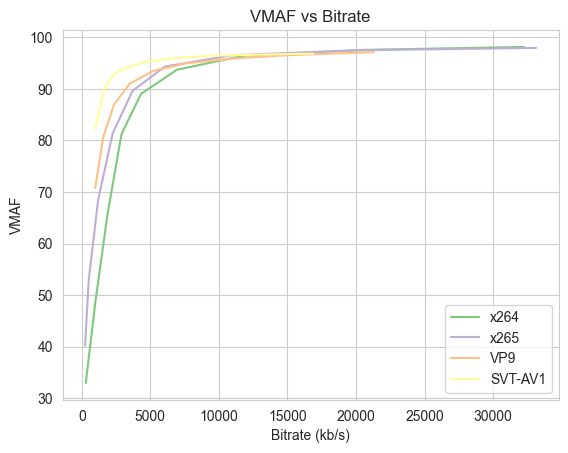

../fig/Animation_average_psnr-bitrate.png


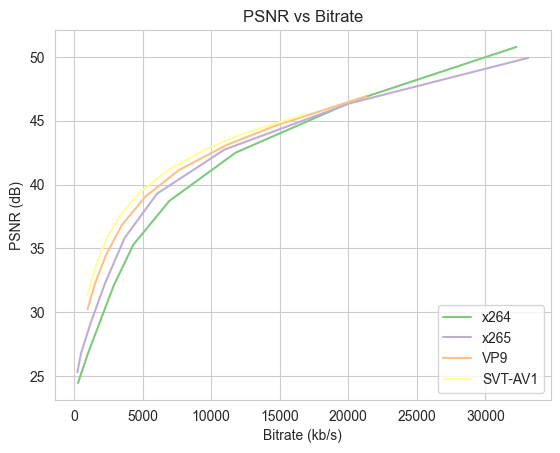

../fig/TelevisionClip_average_vmaf-bitrate.png


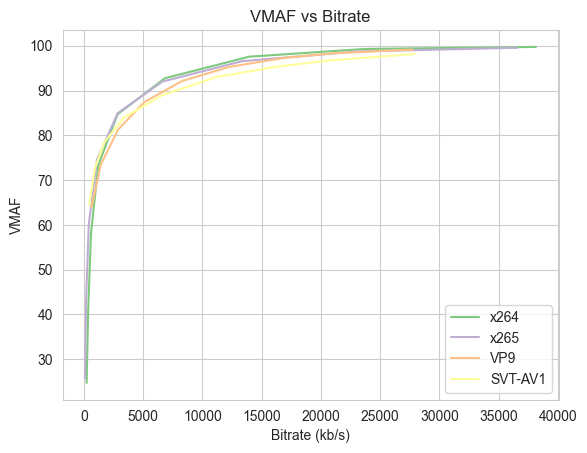

../fig/TelevisionClip_average_psnr-bitrate.png


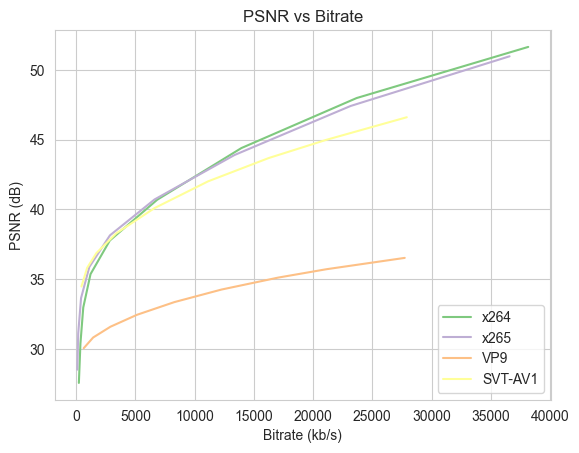

In [1568]:
for cat in cat_uniques:
    cat_data = df[df['category'].isin([cat])]
    # print(cat_data)

    genre_name = cat
    # vmaf
    fig_name1 = f'{genre_name}_average_vmaf-bitrate.png'
    fig_path1 = f'{fig_path}{fig_name1}'
    print(fig_path1)
    fig1 = sns.lineplot(data=cat_data, x='Bitrate (kb/s)', y='VMAF', hue='codec') #, err_style='bars', errorbar=('ci', 95)
    plt.legend(loc='lower right', fontsize=10, title_fontsize=10)
    plt.xlabel('Bitrate (kb/s)')
    plt.ylabel('VMAF')
    plt.title('VMAF vs Bitrate')
    # plt.savefig(fig_path1, dpi=600)
    plt.show()
    plt.close()

    # psnr
    fig_name2 = f'{genre_name}_average_psnr-bitrate.png'
    fig_path2 = f'{fig_path}{fig_name2}'
    print(fig_path2)
    fig2 = sns.lineplot(data=cat_data, x='Bitrate (kb/s)', y='PSNR (dB)', hue='codec')
    plt.legend(loc='lower right', fontsize=10, title_fontsize=10)
    plt.xlabel('Bitrate (kb/s)')
    plt.ylabel('PSNR (dB)')
    plt.title('PSNR vs Bitrate')
    # plt.savefig(fig_path2, dpi=600)
    plt.show()
    plt.close()

# run_plot_quality_avgQP_perCod

In [1569]:
codec = 'SVT-AV1' #['x264', 'x265', 'VP9', 'SVT-AV1']
df = pd.read_csv(f'../metrics/YOUTUBE_UGC_1080P_{codec}_metrics.csv')

../fig/SVT-AV1/average_QP/SVT-AV1_Animation_average_vmaf-bitrate.png


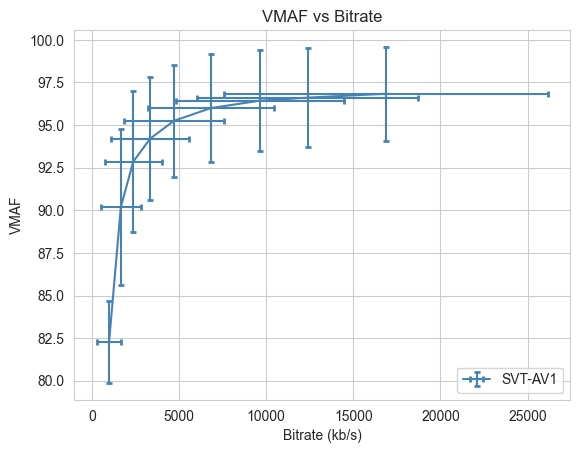

../fig/SVT-AV1/average_QP/SVT-AV1_Animation_average_psnr-bitrate.png


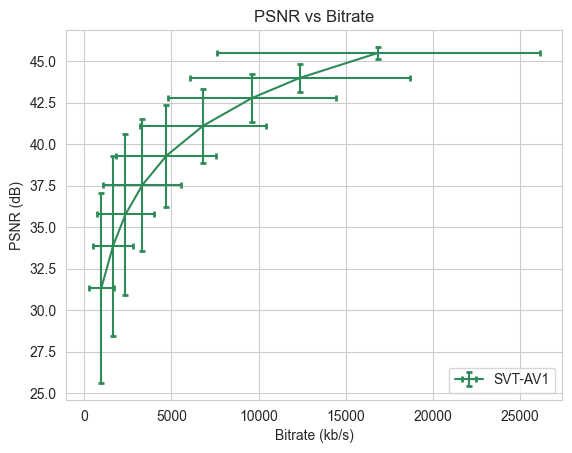

../fig/SVT-AV1/average_QP/SVT-AV1_TelevisionClip_average_vmaf-bitrate.png


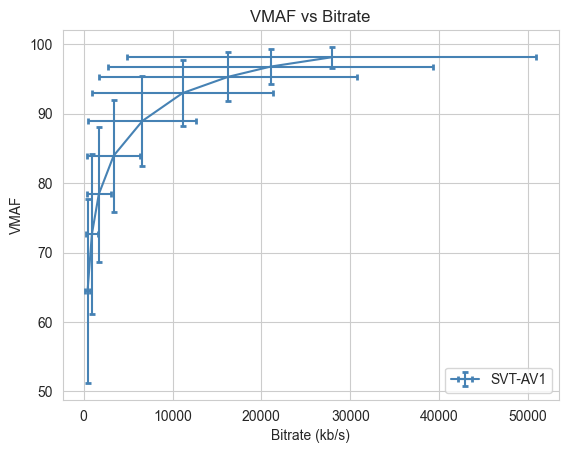

../fig/SVT-AV1/average_QP/SVT-AV1_TelevisionClip_average_psnr-bitrate.png


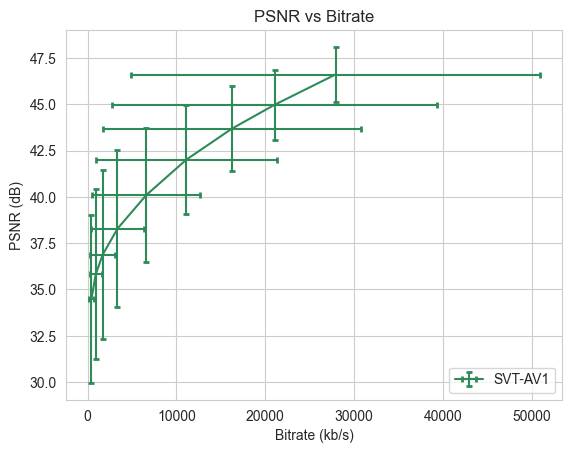

In [1570]:
cat_uniques = df['category'].unique()
for cat in cat_uniques:
    cat_data = df[df['category'].isin([cat])]
    # print(cat_data)

    avg_bitrate = []
    avg_psnr = []
    avg_vmaf = []
    std_bitrate = []
    std_psnr = []
    std_vmaf = []

    qp_uniques = df['QP'].unique()
    for qp in qp_uniques:
        qp_data = cat_data[cat_data['QP'].isin([qp])]
        # print(qp_data)
        # df2 = qp_data[['bitrate_encoded (kb/s)', 'PSNR', 'VMAF', 'QP']].describe()
        # print(df2)

        avg_bitrate.append(qp_data['bitrate_encoded (kb/s)'].mean())
        avg_psnr.append(qp_data['PSNR'].mean())
        avg_vmaf.append(qp_data['VMAF'].mean())

        std_bitrate.append(qp_data['bitrate_encoded (kb/s)'].std(ddof=0))
        std_psnr.append(qp_data['PSNR'].std(ddof=0))
        std_vmaf.append(qp_data['VMAF'].std(ddof=0))

    # print(avg_bitrate)
    # print(avg_psnr)
    # print(avg_vmaf)
    # print(std_bitrate)
    # print(std_psnr)
    # print(std_vmaf)

    genre_name = cat
    # vmaf
    fig_name1 = f'{codec}_{genre_name}_average_vmaf-bitrate.png'
    fig_path1 = f'{fig_path}{codec}/average_QP/{fig_name1}'
    print(fig_path1)
    # fig1 = sns.lineplot(x=avg_bitrate, y=avg_vmaf, color="steelblue")
    plt.errorbar(avg_bitrate, avg_vmaf, xerr=std_bitrate, yerr=std_vmaf, capsize=2, capthick=2, color="steelblue")
    plt.legend(loc='lower right', labels=[f'{codec}'], fontsize=10, title_fontsize=10)
    plt.xlabel('Bitrate (kb/s)')
    plt.ylabel('VMAF')
    plt.title('VMAF vs Bitrate')
    # plt.savefig(fig_path1, dpi=600)
    plt.show()
    plt.close()

    #psnr
    fig_name2 = f'{codec}_{genre_name}_average_psnr-bitrate.png'
    fig_path2 = f'{fig_path}{codec}/average_QP/{fig_name2}'
    print(fig_path2)
    # fig2 = sns.lineplot(x=avg_bitrate, y=avg_psnr, color="seagreen")
    fig2 = plt.errorbar(avg_bitrate, avg_psnr, xerr=std_bitrate, yerr=std_psnr, capsize=2, capthick=2, color="seagreen")
    plt.legend(loc='lower right', labels=[f'{codec}'], fontsize=10, title_fontsize=10)
    plt.xlabel('Bitrate (kb/s)')
    plt.ylabel('PSNR (dB)')
    plt.title('PSNR vs Bitrate')
    # plt.savefig(fig_path2, dpi=600)
    plt.show()
    plt.close()

# run_plot_quality_perSeq_perCod

In [1571]:
metrics = pd.read_csv(f'../metrics/YOUTUBE_UGC_1080P_{codec}_metrics.csv')

In [1572]:
temp_bitrate = []
temp_psnr = []
temp_vmaf = []
temp_qp = []

In [1573]:
fig_op = 'vmaf'
codec = 'SVT-AV1'

../fig/SVT-AV1/Animation_1080P-05f8_vmaf-bitrate.png


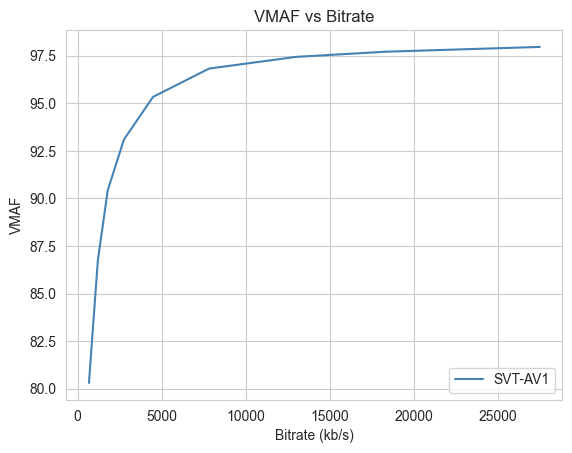

../fig/SVT-AV1/Animation_1080P-3d67_vmaf-bitrate.png


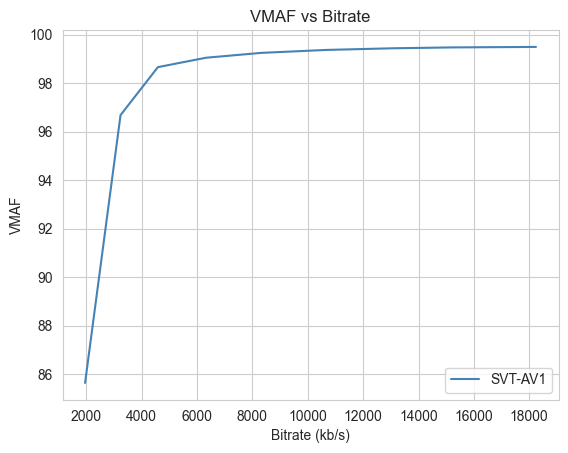

../fig/SVT-AV1/Animation_1080P-646f_vmaf-bitrate.png


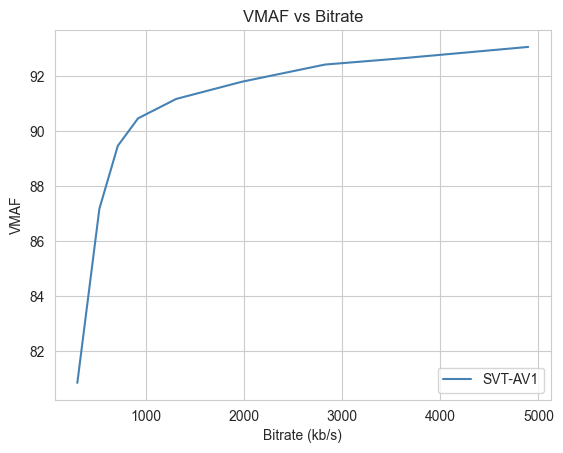

../fig/SVT-AV1/TelevisionClip_1080P-3d83_vmaf-bitrate.png


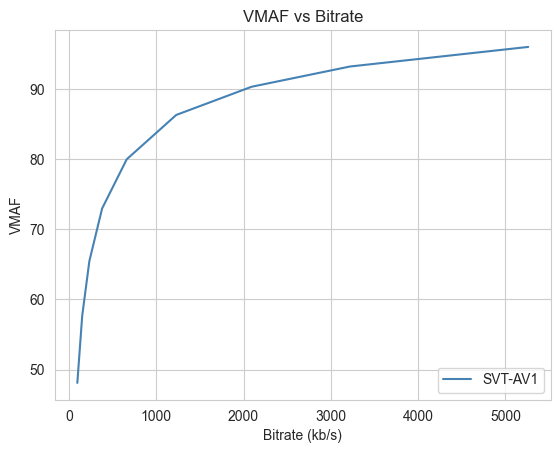

../fig/SVT-AV1/TelevisionClip_1080P-5278_vmaf-bitrate.png


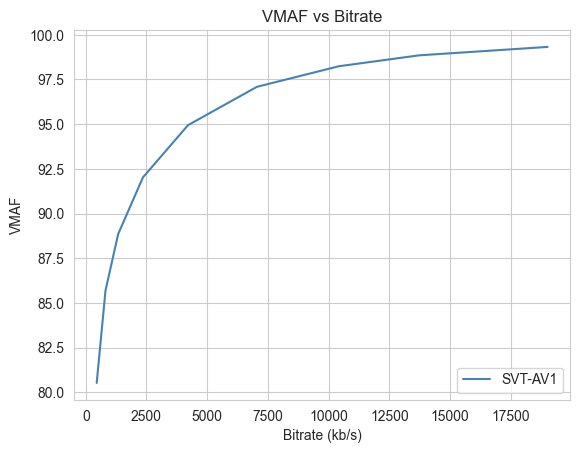

../fig/SVT-AV1/TelevisionClip_1080P-68c6_vmaf-bitrate.png


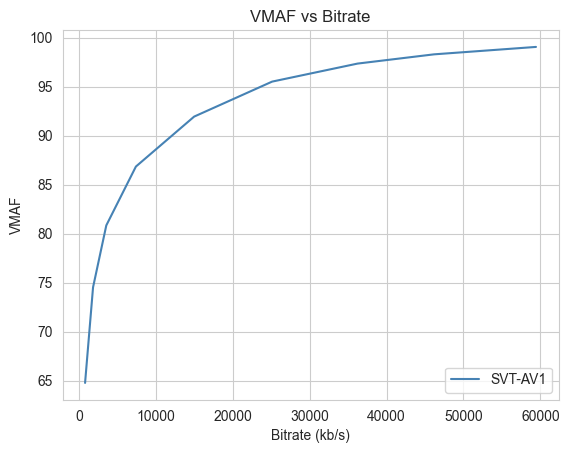

In [1574]:
# seq_op == 'per':
for i in range(len(metrics)):
    if i < len(metrics)-1 and metrics['vid'][i] == metrics['vid'][i+1]:
        temp_bitrate.append(metrics['bitrate_encoded (kb/s)'][i])
        temp_psnr.append(metrics['PSNR'][i])
        temp_vmaf.append(metrics['VMAF'][i])
        temp_qp.append(metrics['QP'][i])
    else:
        temp_bitrate.append(metrics['bitrate_encoded (kb/s)'][i])
        temp_psnr.append(metrics['PSNR'][i])
        temp_vmaf.append(metrics['VMAF'][i])
        temp_qp.append(metrics['QP'][i])
        df_sort = pd.DataFrame(columns=['Bitrate (kb/s)', 'PSNR (dB)', 'VMAF', 'QP'])
        df_sort['Bitrate (kb/s)'] = temp_bitrate
        df_sort['PSNR (dB)'] = temp_psnr
        df_sort['VMAF'] = temp_vmaf
        df_sort['QP'] = temp_qp
        # print(df_sort)
        df_sort = df_sort.sort_values(by=['Bitrate (kb/s)'])
        # print(df_sort)
        video_name = metrics['vid'][i]

        if fig_op == 'vmaf':
            fig_name1 = f'{video_name}_vmaf-bitrate.png'
            fig_path1 = f'{fig_path}{codec}/{fig_name1}'
            print(fig_path1)
            fig1 = sns.lineplot(data=df_sort, x="Bitrate (kb/s)", y="VMAF", color="steelblue")
            plt.legend(loc='lower right', labels=[f'{codec}'], fontsize=10, title_fontsize=10)
            plt.xlabel('Bitrate (kb/s)')
            plt.ylabel('VMAF')
            plt.title('VMAF vs Bitrate')
            line_fig1 = fig1.get_figure()
            # line_fig1.savefig(fig_path1, dpi=400)
            plt.show()
            plt.close(line_fig1)

        elif fig_op == 'psnr':
            fig_name2 = f'{video_name}_psnr-bitrate.png'
            fig_path2 = f'{fig_path}{codec}/{fig_name2}'
            print(fig_path2)
            fig2 = sns.lineplot(data=df_sort, x="Bitrate (kb/s)", y="PSNR (dB)", color="steelblue")
            plt.legend(loc='lower right', labels=[f'{codec}'], fontsize=10, title_fontsize=10)
            plt.xlabel('Bitrate (kb/s)')
            plt.ylabel('PSNR (dB)')
            plt.title('PSNR vs Bitrate')
            line_fig2 = fig2.get_figure()
            # line_fig2.savefig(fig_path2, dpi=400)
            plt.show()
            plt.close(line_fig2)

        # return zero
        temp_bitrate = []
        temp_psnr = []
        temp_vmaf = []
        temp_qp = []

In [1575]:
# seq_op == 'all':
metrics.sort_values(by=['bitrate_encoded (kb/s)'])
# print(metrics)

df_sort = pd.DataFrame(columns=['vid', 'Bitrate (kb/s)', 'PSNR (dB)', 'VMAF', 'QP'])
df_sort['vid'] = metrics.sort_values(by=['bitrate_encoded (kb/s)'])['vid'].values.tolist()
df_sort['Bitrate (kb/s)'] = metrics.sort_values(by=['bitrate_encoded (kb/s)'])['bitrate_encoded (kb/s)'].values.tolist()
df_sort['PSNR (dB)'] = metrics.sort_values(by=['bitrate_encoded (kb/s)'])['PSNR'].values.tolist()
df_sort['VMAF'] = metrics.sort_values(by=['bitrate_encoded (kb/s)'])['VMAF'].values.tolist()
df_sort['QP'] = metrics.sort_values(by=['bitrate_encoded (kb/s)'])['QP'].values.tolist()
# metrics

../fig/SVT-AV1/SVT-AV1_vmaf-bitrate.png


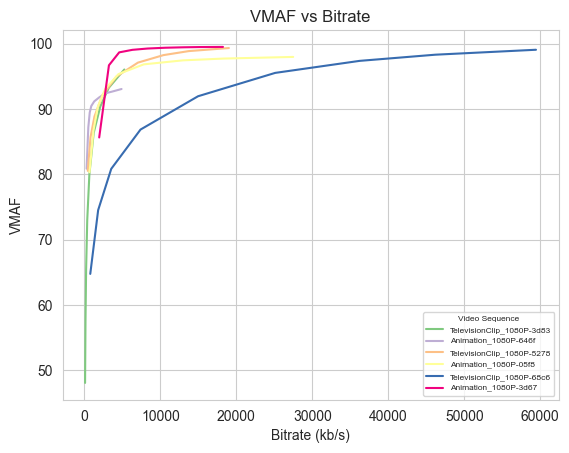

In [1576]:
fig_op == 'vmaf'
fig_name1 = f'{codec}_vmaf-bitrate.png'
fig_path1 = f'{fig_path}{codec}/{fig_name1}'
print(fig_path1)
fig1 = sns.lineplot(data=df_sort, x="Bitrate (kb/s)", y="VMAF", hue='vid', palette="Accent")
plt.legend(loc='lower right', title='Video Sequence', fontsize=6, title_fontsize=6)
plt.xlabel('Bitrate (kb/s)')
plt.ylabel('VMAF')
plt.title('VMAF vs Bitrate')
line_fig1 = fig1.get_figure()
# line_fig1.savefig(fig_path1, dpi=400)
plt.show()
plt.close(line_fig1)

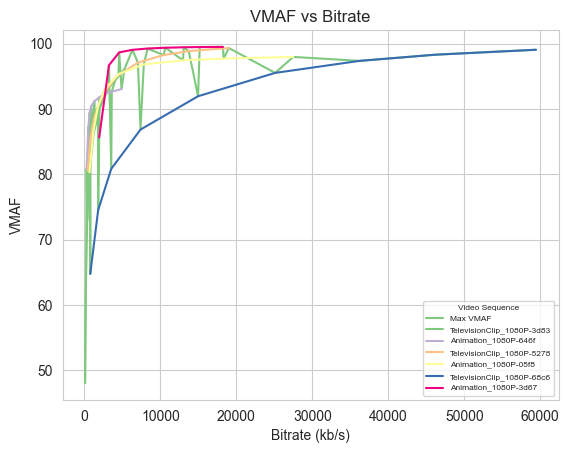

In [1577]:
max_vmaf_dict = {}
for bitrate in df_sort['Bitrate (kb/s)'].unique():
    max_vmaf = df_sort[df_sort['Bitrate (kb/s)'] == bitrate]['VMAF'].max()
    max_vmaf_dict[bitrate] = max_vmaf

fig2, ax2 = plt.subplots()
ax2.plot(list(max_vmaf_dict.keys()), list(max_vmaf_dict.values()), label='Max VMAF')

fig2 = sns.lineplot(data=df_sort, x="Bitrate (kb/s)", y="VMAF", hue='vid', palette="Accent", ax=ax2)

plt.legend(loc='lower right', title='Video Sequence', fontsize=6, title_fontsize=6)
plt.xlabel('Bitrate (kb/s)')
plt.ylabel('VMAF')
plt.title('VMAF vs Bitrate')

plt.show()
plt.close()

[27486, 18323, 12981, 7822, 4491, 2759, 1795, 1207, 678]
[97.962394, 97.710907, 97.438095, 96.824846, 95.337259, 93.100422, 90.428001, 86.740596, 80.307611]
[18244, 15185, 13079, 10662, 8324, 6326, 4586, 3236, 1955]
[99.491664, 99.47137, 99.435378, 99.367448, 99.246377, 99.046355, 98.658382, 96.680756, 85.639336]
[4896, 3610, 2823, 1978, 1306, 916, 710, 522, 297]
[93.053408, 92.641734, 92.413355, 91.791661, 91.166537, 90.45969, 89.464155, 87.180074, 80.859253]
[5261, 3219, 2092, 1229, 662, 380, 234, 152, 96]
[96.037167, 93.241658, 90.351996, 86.328196, 80.003148, 72.982115, 65.484111, 57.678021, 48.088323]
[19023, 13732, 10421, 7051, 4212, 2353, 1333, 811, 449]
[99.322307, 98.851784, 98.240371, 97.091087, 94.946864, 92.023822, 88.850751, 85.688205, 80.527224]
[59432, 46179, 36226, 25111, 14966, 7391, 3541, 1817, 780]
[99.058572, 98.301578, 97.358284, 95.518372, 91.946924, 86.849308, 80.843522, 74.52387, 64.767544]


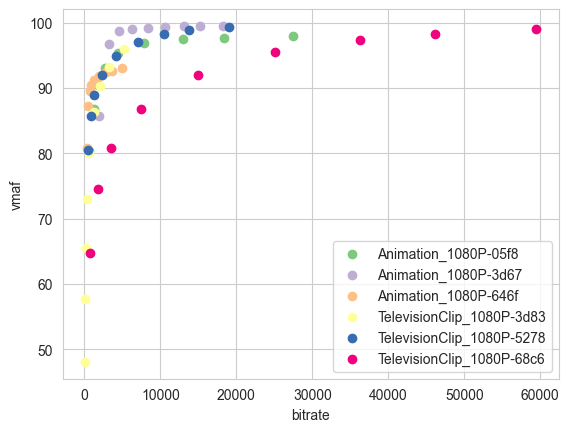

In [1578]:
# 设置Seaborn配色方案为"Accent"
sns.set_palette("Accent")

vid_uniques = metrics['vid'].unique()
bitrate_max_vmaf = {}

colors = sns.color_palette("Accent", len(vid_uniques))
# ColorBrewer Set1
# colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999']

for index, vid in enumerate(vid_uniques):
    vid_data = metrics[metrics['vid'] == vid].reset_index(drop=True)

    bitrate_list = vid_data['bitrate_encoded (kb/s)'].tolist()
    vmaf_list = vid_data['VMAF'].tolist()
    print(bitrate_list)
    print(vmaf_list)

    for bitrate, vmaf in zip(bitrate_list, vmaf_list):
        if bitrate not in bitrate_max_vmaf or vmaf > bitrate_max_vmaf[bitrate]:
            bitrate_max_vmaf[bitrate] = vmaf

    # scatter
    plt.scatter(bitrate_list, vmaf_list, color=colors[index])

plt.xlabel('bitrate')
plt.ylabel('vmaf')
plt.legend(vid_uniques)
plt.show()
plt.close()

[(96, 48.088323), (152, 57.678021), (234, 65.484111), (297, 80.859253), (380, 72.982115), (449, 80.527224), (522, 87.180074), (662, 80.003148), (678, 80.307611), (710, 89.464155), (780, 64.767544), (811, 85.688205), (916, 90.45969), (1207, 86.740596), (1229, 86.328196), (1306, 91.166537), (1333, 88.850751), (1795, 90.428001), (1817, 74.52387), (1955, 85.639336), (1978, 91.791661), (2092, 90.351996), (2353, 92.023822), (2759, 93.100422), (2823, 92.413355), (3219, 93.241658), (3236, 96.680756), (3541, 80.843522), (3610, 92.641734), (4212, 94.946864), (4491, 95.337259), (4586, 98.658382), (4896, 93.053408), (5261, 96.037167), (6326, 99.046355), (7051, 97.091087), (7391, 86.849308), (7822, 96.824846), (8324, 99.246377), (10421, 98.240371), (10662, 99.367448), (12981, 97.438095), (13079, 99.435378), (13732, 98.851784), (14966, 91.946924), (15185, 99.47137), (18244, 99.491664), (18323, 97.710907), (19023, 99.322307), (25111, 95.518372), (27486, 97.962394), (36226, 97.358284), (46179, 98.3015

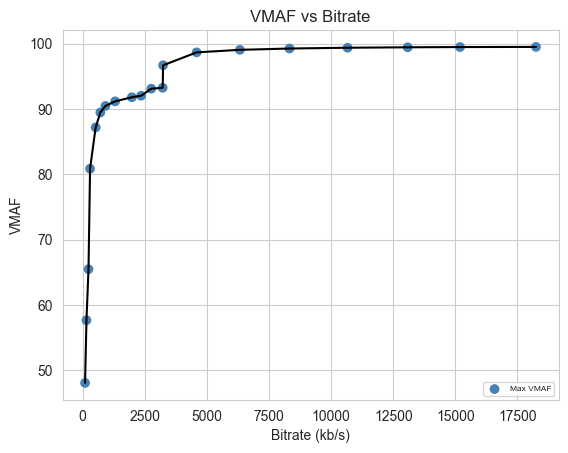

In [1579]:
sorted_data = sorted(bitrate_max_vmaf.items(), key=lambda x: x[0])
print(sorted_data)
print(sorted(bitrate_max_vmaf))

new_data = {}
prev_value = float('-inf')

for key in sorted(bitrate_max_vmaf):
    value = bitrate_max_vmaf[key]
    if value >= prev_value:
        new_data[key] = value
        prev_value = value

print(new_data)
# scatter
bitrate_list = list(new_data.keys())
vmaf_list = list(new_data.values())

colors = ['steelblue'] * len(bitrate_list)
plt.scatter(bitrate_list, vmaf_list, c=colors, label='Max VMAF')
sns.lineplot(x=bitrate_list, y=vmaf_list, color="k")

plt.legend(loc='lower right', fontsize=6, title_fontsize=6)
plt.xlabel('Bitrate (kb/s)')
plt.ylabel('VMAF')
plt.title('VMAF vs Bitrate')

# 显示图形
plt.show()
plt.close()


../fig/SVT-AV1/SVT-AV1_psnr-bitrate.png


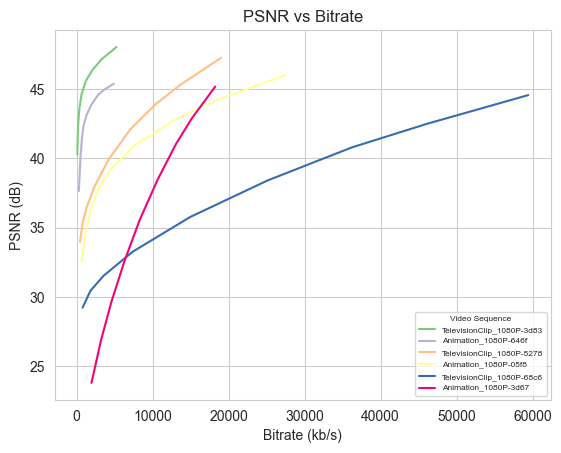

In [1580]:
fig_op == 'psnr'
fig_name2 = f'{codec}_psnr-bitrate.png'
fig_path2 = f'{fig_path}{codec}/{fig_name2}'
print(fig_path2)
fig2 = sns.lineplot(data=df_sort, x="Bitrate (kb/s)", y="PSNR (dB)", hue='vid', palette="Accent")
plt.legend(loc='lower right', title='Video Sequence', fontsize=6, title_fontsize=6)
plt.xlabel('Bitrate (kb/s)')
plt.ylabel('PSNR (dB)')
plt.title('PSNR vs Bitrate')
line_fig2 = fig2.get_figure()
# line_fig2.savefig(fig_path2, dpi=400)
plt.show()
plt.close(line_fig2)